<a href="https://colab.research.google.com/github/DomMc97/Citation-Graph-Clustering/blob/main/Comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of the Clusterings

A comparison of the unsupervised clusterings of the feature matrix and the citation graph.



---



## Set Up

In [15]:
# scientific library
import numpy as np

# data analytics library
import pandas as pd

# sklearn functions
from sklearn.metrics.cluster import adjusted_mutual_info_score, \
adjusted_rand_score, contingency_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# networkx
import networkx as nx

# plotting libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
sns.set() #sets design of figures
import plotly.graph_objects as go

# libraries for saving/loading data
import pickle
from google.colab import drive

Mount Google Drive.

In [3]:
# mount drive
drive.mount('/content/drive')

# root of all file paths used in notebook
root = '/content/drive/My Drive/Methods for Data Science/CW3/Data/'

Mounted at /content/drive


Asks user whether this is the first run of the code to avoid repeat computations.

In [4]:
# code reapeats until a valid input is inserted for the question.
while True:
    init_run = input('Is this the first run of the code y/n?\n')

    if init_run == 'y':
        init_run = True
        break
    elif init_run == 'n':
        init_run = False
        break
    else:
        print('Invalid input.\n')

Is this the first run of the code y/n?
n


Importation of the clusters and the graph layout.

In [5]:
# feature matix cluster labels
feature_labels = pickle.load(open(root + 'labels.sav', 'rb'))

# citation graph cluster labels
graph_set = pickle.load(open(root + 'cnm_labels.sav', 'rb'))

# load graph layout
pos = pickle.load(open(root + 'pos.sav', 'rb'))

# feature matrix
F = pd.read_csv(root + 'feature_matrix.csv', header=None)

# adjacency matrix
A = pd.read_csv(root + 'adjacency_matrix.csv', header=None)

# conversion of A into a graph
A = nx.from_pandas_adjacency(A)

## Simlarity of Clusters

I will use Adjusted Mutual Information (AMI) and Adjusted
Rand Index (ARI) to score how similar the optimal clusterings obtained for the feature matrix and citation graph are to each other. 

**AMI:**

AMI is a variation of mutual information (MI) used for comparing clusterings. MI quantifies the "amount of information" obtained about one random variable through observing the other random variable. 

The MI between 2 partitions $U, V$ is: $$MI(U,V) = \sum_{i=1}\sum_{j=1}P(i,j)ln\frac{P(i,j)}{P(i)P'(j)}$$

where, $P(i) = \frac{|U_{i}|}{N}$, $P(j) = \frac{|V_{i}|}{N}$, $P(i,j) = \frac{|U_{i}\cup V_{j}|}{N}$

AMI is then an adjustment of the MI score to account for chance.

The AMI returns a value of 1 when the two partitions are perfectly matched. Random partitions have an expected AMI around 0 on average.

**ARI:**

ARI is then an adjustment of the Rank Index (RI) to account for chance.

The RI is a measure of the percentage of correct decisions made by an algorithm.

$RI= \frac {TP+TN}{TP+FP+FN+TN}$ 

Where, $TP$ is the number of true positives, $TN$ is the number of true negatives, $FP$ is the number of false positives, and $FN$ is the number of false negatives.

An ARI score rakes values between -1.0 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.

In [7]:
# converts results of graph_labels to compatible format to feature_labels
# array of zeroes
graph_labels = np.zeros(len(feature_labels))

# assign each nodes its graph cluster label
for i, cluster in enumerate(graph_set):
    graph_labels[sorted(cluster)] = i

# AMI score
AMI = adjusted_mutual_info_score(feature_labels, graph_labels)

# ARI score
ARI = adjusted_rand_score(feature_labels, graph_labels)

# prints results
print('################################################')
print('The similarities between the optimal clusterings')
print('################################################\n')
print('The AMI %.5f.' %AMI)
print('The ARI %.5f.\n' %ARI)

################################################
The similarities between the optimal clusterings
################################################

The AMI 0.12167.
The ARI 0.05474.



## Visualisation of Clusterings


A plot of both clusters on the networkx graph.

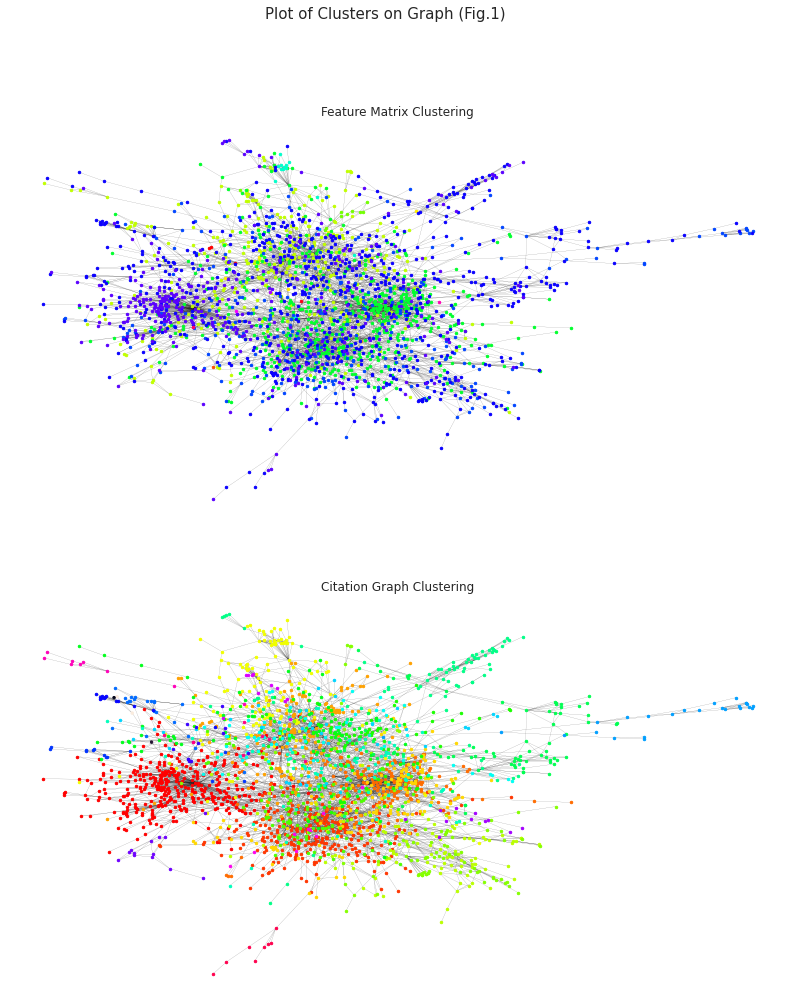

In [8]:
# creates figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# sets title 
fig.suptitle('Plot of Clusters on Graph (Fig.1)',fontsize=15)

# set sub title
ax1.set_title('Feature Matrix Clustering')

# draws graph without colours
nx.draw_networkx_edges(A, pos, width=0.1,ax=ax1)

# creates colour map of size 20
cmap = plt.cm.get_cmap('hsv', 20)

# convert labels to a set
feature_set = {i: np.where(feature_labels == i)[0] for i in range(20)}

# sets node colours
for i, key in enumerate(feature_set.keys()):
    color = cmap(i)
    nx.draw_networkx_nodes(A, pos,node_size=6, nodelist=feature_set[key],
                           node_color=color, ax=ax1)
    
# set sub title
ax2.set_title('Citation Graph Clustering')

# draws graph without colours
nx.draw_networkx_edges(A, pos, width=0.1, ax=ax2)

# creates colour map of size k*
cmap = plt.cm.get_cmap('hsv', 29)

# sets node colours
for i, com in enumerate(graph_set):
  color = cmap(i)
  nx.draw_networkx_nodes(A, pos,node_size=6, nodelist=com, node_color=color,
                         ax=ax2)

ax1.axis('off')
ax2.axis('off')
plt.show()

I will now use T-SNE and PCA to map the feature matrix.

In [9]:
# PCA of the Feature Martix to 400 components
pca = PCA(n_components=300)
pca_result = pca.fit_transform(F)
print('Cumulative explained variation for 50 principal components: {}'.format(
    np.sum(pca.explained_variance_ratio_)))

# T-SNE to 2 components
tsne = TSNE(perplexity=20, n_iter=1000)
tsne_results = tsne.fit_transform(pca_result)

# create dataframe to store results
d = {'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'feature': 
     feature_labels, 'graph': graph_labels} 
clusters = pd.DataFrame(data=d)

Cumulative explained variation for 50 principal components: 0.7354093308918601


Visualise the clusters on the 2D-representations.

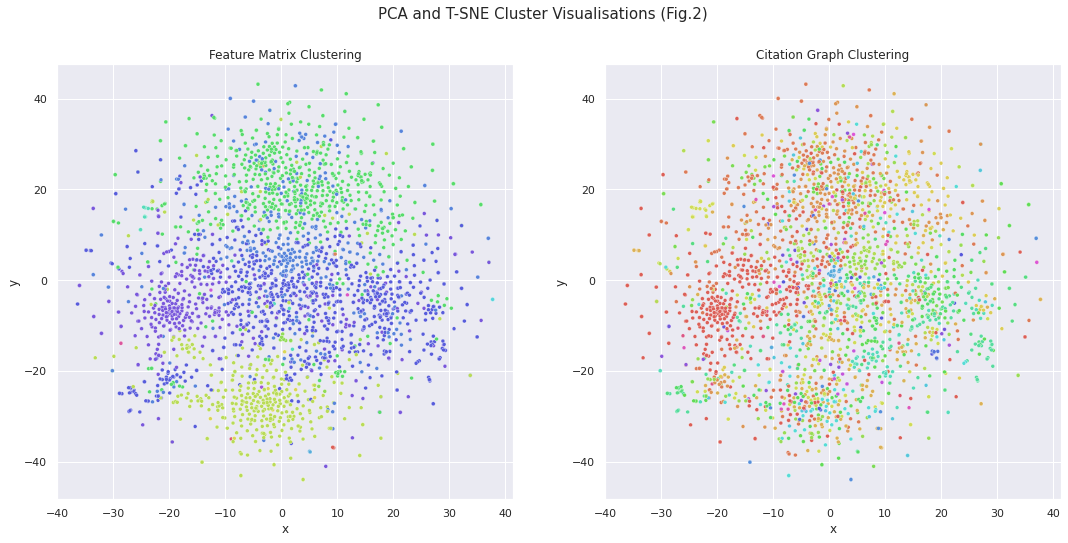

In [10]:
# creates figure
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,8))

# sets title 
fig.suptitle('PCA and T-SNE Cluster Visualisations (Fig.2)', fontsize=15)

# feature matrix clustering
sns.scatterplot(
    x="x", y="y",
    hue="feature",
    palette=sns.color_palette("hls", 20),
    data=clusters,
    s=15,
    legend=False,
    ax=ax1
)

# set sub title
ax1.set_title('Feature Matrix Clustering')

sns.scatterplot(
    x="x", y="y",
    hue="graph",
    palette=sns.color_palette("hls", 29),
    data=clusters,
    s=15,
    legend=False,
    ax=ax2
)

# set sub title
ax2.set_title('Citation Graph Clustering')

plt.show()

### Comparison of Clusters

I'll start the comparision of clusters by returning statistics by comparing the distribution of cluster sizes.

In [21]:
# load feature cluster size distribution stats
feature_stats = pickle.load(open(root + 'feature_stats.sav', 'rb'))
# load graph cluster size distribution stats
graph_stats = pickle.load(open(root + 'graph_stats.sav', 'rb'))

# create table
d = {'Citation Graph Clustering': graph_stats, 'Feature Matrix Clustering':
     feature_stats}
stats = pd.DataFrame(data=d, index=['No. Clusters', 'mean','max','min','std'])

# cluster size statistics
print('########################')
print('Cluster Sizes Statistics')
print('########################\n')
stats

########################
Cluster Sizes Statistics
########################



,Citation Graph Clustering,Feature Matrix Clustering
No. Clusters,29.000000,20.000000
mean,85.689655,124.250000
max,391.000000,753.000000
min,4.000000,1.000000
std,93.133239,225.851694


I will also return a contingency matrix to compare the similarity of the clusters.

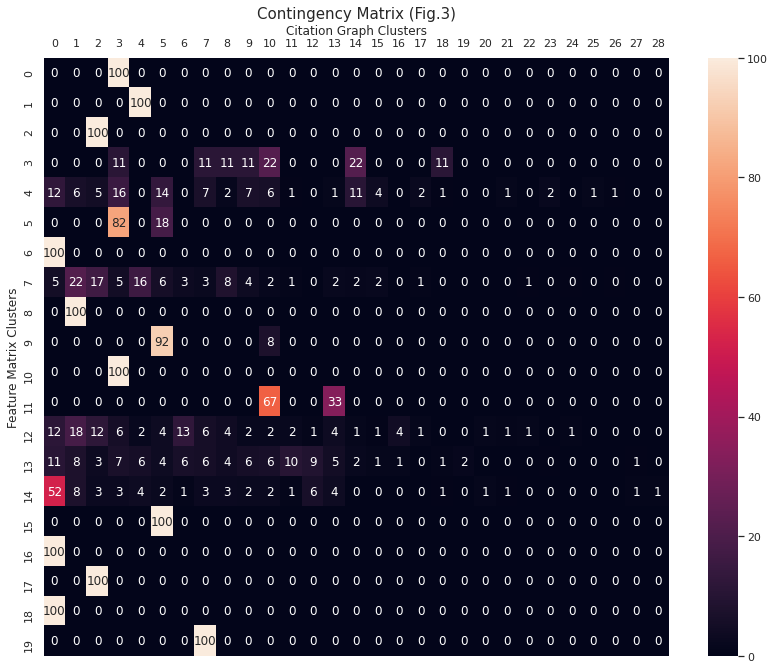

In [71]:
# a contingency matrix
mat = contingency_matrix(feature_labels, graph_labels)

# plot of this matrix normalised for percentage splits
fig = plt.figure(figsize=(14,11))
ax = sns.heatmap(100*(mat/np.sum(mat, axis=1)[:, None]), annot=True,fmt='.0f')
ax.tick_params(axis='both', which='major',labelbottom = False,
                  bottom=False, top = False, labeltop=True)
ax.set_ylabel('Feature Matrix Clusters')
ax.xaxis.set_label_position('top')
ax.set_xlabel('Citation Graph Clusters')
plt.title('Contingency Matrix (Fig.3)', fontsize='15')
plt.show()

I will display this data in the form of a Sankey diagram.

In [74]:
# prepares the data into the format needed for Sankey 
sources = []
targets = []
values = []
for i in range(20):
    for j in range(29):
        val = mat[i, j]
        if val > 0:
            sources.append(i) 
            targets.append(20 + j)
            values.append(val)

# create labels for the clusters
cluster_labels = ['Feature Cluster ' + str(i) for i in range(20)] + [
  'Graph Cluster ' + str(i) for i in range(29)]


# Sankey Plot
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 60,
      thickness = 20,
      label = cluster_labels,
    ),
    link = dict(
      source = sources,
      target = targets,
      value = values,
  ))])
fig.update_layout(title_text='Sankey Diagram of Clusters (Fig.4)', font_size=11)
fig.show()

## Discussion

For both AMI and ARI we see a small similiarity from the values of 0.12167 and 0.05474 respectively. Theses values are slightly better than random which is 0 for both similarity measures. 

The slight similarity is due to the fact papers from scientific sub-disipline will have certain words they will more likely use and thus they are more likely to be a cluster in the feature matrix, and a paper is more likely to cite a paper from it's own disipline so it will more likely be a cluster in the citation graph as well.

The first notable difference which can be seen between the clusterings is the fact that the modularity maximised cluster of the citation graph has 9 more clusters than the k-means clustering of the feature matrix.

The discrepancies in the number of clusters partly arises due to the 8 clusters of the feature martix which only contain one document. These documents can be interpreted as niche papers which are highly speciallised and do not fit into the broader categories.

The citation graph clustering seems to be more evenly distributed when it comes to cluster size. The feature matrix clusters consist of large clusters and are surrounded by 15 smaller clusters. The smaller clusters can be interpret as inter-disiplinary clusters.
 